In [1]:
import pandas as pd

import torch, sys
print(torch.__version__, "CUDA?", torch.cuda.is_available())
print("Kernel Python:", sys.executable)

2.5.1 CUDA? True
Kernel Python: c:\Users\ASUS\anaconda3\envs\book-recommender\python.exe


In [2]:
books = pd.read_csv(r"C:\Users\ASUS\book-recommender-system\data\books.csv")

In [3]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

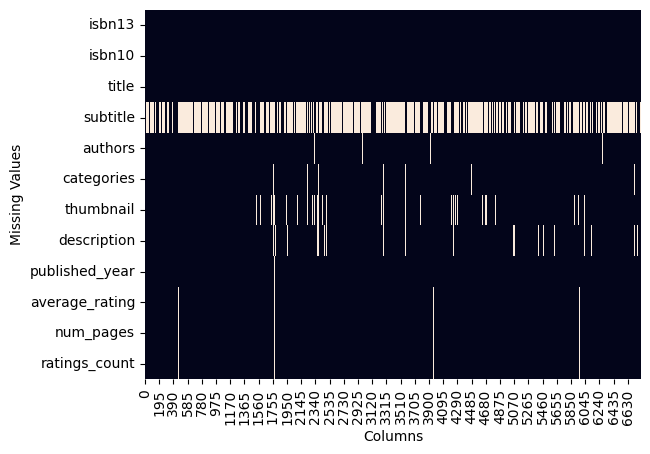

In [5]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()

In [6]:
import numpy as np

In [7]:
books["missing_description"] = np.where(books["description"].isna(),1,0)
books["age_of_book"] = 2025 - books["published_year"]

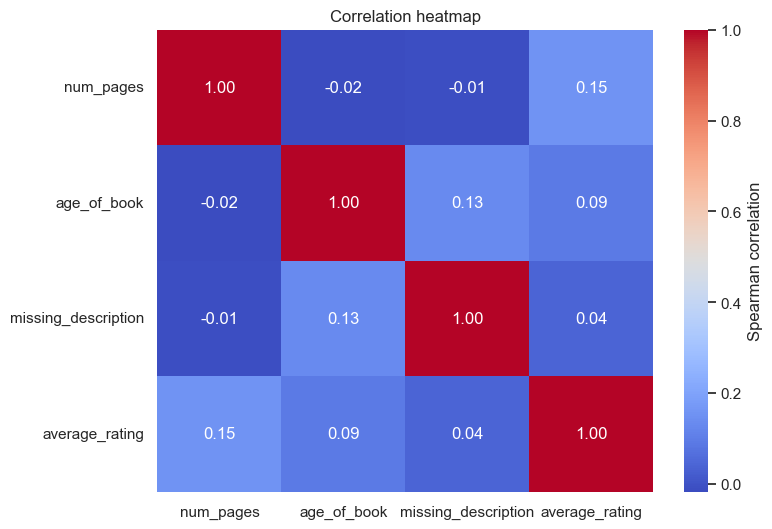

In [8]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman correlation"})

heatmap.set_title("Correlation heatmap")
plt.show()

In [9]:
books[(books["description"].isna()) |
      (books["num_pages"].isna()) |
      (books["average_rating"].isna()) |
      (books["published_year"].isna())
      ]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0


In [10]:
books_full = books[~(books["description"].isna()) &
      ~ (books["num_pages"].isna()) &
      ~ (books["average_rating"].isna()) &
      ~ (books["published_year"].isna())
      ]

In [11]:
books_full

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [12]:
books_full["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


In [13]:
books_full["words_in_description"] = books_full["description"].str.split().str.len()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22384\144227061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_full["words_in_description"] = books_full["description"].str.split().str.len()


In [14]:
books_full.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,0,48.0,1
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0,80
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0,160
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0,30


In [15]:
books_full.loc[books_full["words_in_description"].between(25,34), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [16]:
books_full_25_words = books_full[books_full["words_in_description"]>=25]

In [17]:
books_full_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174


In [18]:
books_full_25_words["title_and_subtitle"] = (np.where(books_full_25_words["subtitle"].isna(), books_full_25_words["title"], books_full_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1)))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22384\4028315177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_full_25_words["title_and_subtitle"] = (np.where(books_full_25_words["subtitle"].isna(), books_full_25_words["title"], books_full_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1)))


In [19]:
books_full_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


In [20]:
books_full_25_words["tagged_description"]=books_full_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22384\2952132420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_full_25_words["tagged_description"]=books_full_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


In [21]:
books_full_25_words.drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1).to_csv("books_cleaned.csv", index=False)

In [22]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma

In [23]:
from dotenv import load_dotenv

load_dotenv()

True

In [24]:
books = pd.read_csv("books_cleaned.csv")

In [25]:
books["tagged_description"]

0       9780002005883 A NOVEL THAT READERS and critics...
1       9780002261982 A new 'Christie for Christmas' -...
2       9780006178736 A memorable, mesmerizing heroine...
3       9780006280897 Lewis' work on the nature of lov...
4       9780006280934 "In The Problem of Pain, C.S. Le...
                              ...                        
5192    9788172235222 On A Train Journey Home To North...
5193    9788173031014 This book tells the tale of a ma...
5194    9788179921623 Wisdom to Create a Life of Passi...
5195    9788185300535 This collection of the timeless ...
5196    9789027712059 Since the three volume edition o...
Name: tagged_description, Length: 5197, dtype: object

In [26]:
books["tagged_description"].to_csv("tagged_description.txt",
                                   sep = "\n",
                                   index = False,
                                   header =False)

In [27]:
raw_documents = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter(chunk_size = 0, chunk_overlap=0, separator="\n")
documents=text_splitter.split_documents(raw_documents)

Created a chunk of size 1168, which is longer than the specified 0
Created a chunk of size 1214, which is longer than the specified 0
Created a chunk of size 373, which is longer than the specified 0
Created a chunk of size 309, which is longer than the specified 0
Created a chunk of size 483, which is longer than the specified 0
Created a chunk of size 482, which is longer than the specified 0
Created a chunk of size 960, which is longer than the specified 0
Created a chunk of size 188, which is longer than the specified 0
Created a chunk of size 843, which is longer than the specified 0
Created a chunk of size 296, which is longer than the specified 0
Created a chunk of size 197, which is longer than the specified 0


Created a chunk of size 881, which is longer than the specified 0
Created a chunk of size 1088, which is longer than the specified 0
Created a chunk of size 1189, which is longer than the specified 0
Created a chunk of size 304, which is longer than the specified 0
Created a chunk of size 270, which is longer than the specified 0
Created a chunk of size 211, which is longer than the specified 0
Created a chunk of size 214, which is longer than the specified 0
Created a chunk of size 513, which is longer than the specified 0
Created a chunk of size 752, which is longer than the specified 0
Created a chunk of size 388, which is longer than the specified 0
Created a chunk of size 263, which is longer than the specified 0
Created a chunk of size 253, which is longer than the specified 0
Created a chunk of size 306, which is longer than the specified 0
Created a chunk of size 728, which is longer than the specified 0
Created a chunk of size 721, which is longer than the specified 0
Created 

In [28]:
documents[0]

Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gi

In [29]:
db_books= Chroma.from_documents(documents, embedding=OpenAIEmbeddings())

In [30]:
query = "A book to teach children about nature"
docs = db_books.similarity_search(query, k=10)
docs

[Document(id='5521d6b0-1b12-4c04-a789-75219d42597a', metadata={'source': 'tagged_description.txt'}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(id='b8583644-dd71-4b77-8ef3-a39fb263c60b', metadata={'source': 'tagged_description.txt'}, page_content="9780786808380 Introduce your babies to birds, cats, dogs, and babies through fine art, illustration, and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from simple child's drawings and abstract art to playful photos. A brief text accompanies each image, introducing the baby to some basic -- and sometimes playful -- information about the subjects."),
 Document(id='db78bf94-5194-4882-9b8f-9569e6977be2', metadata={'source': '

In [31]:
books[books["isbn13"] == int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...


In [32]:
def retrieve_semantic_recommendations(query:str, top_k: int = 10) -> pd.DataFrame:
    recs = db_books.similarity_search(query, k = 50)

    books_list=[]

    for i in range(0, len(recs)):
        books_list += [int(recs[i].page_content.strip('"').split()[0])]

    return books[books["isbn13"].isin(books_list)].head(top_k)

In [33]:
retrieve_semantic_recommendations("A book to teach children about nature")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
31,9780007105045,0007105045,Tree and Leaf,John Ronald Reuel Tolkien,Literary Collections,http://books.google.com/books/content?id=aPb_A...,"""The two works 'On fairy-stories' and 'Leaf by...",2001.0,4.09,176.0,2245.0,Tree and Leaf: The Homecoming of Beorhtnoth : ...,"9780007105045 ""The two works 'On fairy-stories..."
59,9780007151240,0007151241,The Family Way,Tony Parsons,Parenthood,http://books.google.com/books/content?id=dJEIx...,It should be the most natural thing in the wor...,2005.0,3.51,400.0,2095.0,The Family Way,9780007151240 It should be the most natural th...
143,9780060546571,0060546573,Three Rotten Eggs,Gregory Maguire,Juvenile Fiction,http://books.google.com/books/content?id=t2pWl...,The students of Miss Earth's class in rural Ve...,2005.0,3.74,240.0,76.0,Three Rotten Eggs,9780060546571 The students of Miss Earth's cla...
429,9780064434980,0064434982,The Deer in the Wood,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=V7YDW...,Even the youngest child can enjoy a special ad...,1999.0,4.17,32.0,302.0,The Deer in the Wood,9780064434980 Even the youngest child can enjo...
442,9780067575208,006757520X,The Sense of Wonder,Rachel Carson,Nature,http://books.google.com/books/content?id=Zee5S...,"First published more than three decades ago, t...",1998.0,4.39,112.0,1160.0,The Sense of Wonder,9780067575208 First published more than three ...
692,9780140448009,0140448004,Three Tales,Gustave Flaubert;Roger Whitehouse;Geoffrey Wall,Fiction,http://books.google.com/books/content?id=XFzga...,Features short fiction by the French naturalis...,2005.0,3.71,110.0,3050.0,Three Tales,9780140448009 Features short fiction by the Fr...
707,9780140568196,0140568190,The Giraffe and the Pelly and Me,Roald Dahl;Quentin Blake,Candy,http://books.google.com/books/content?id=J7FdI...,"A Dahl story in which the giraffe, the pelican...",2001.0,3.81,32.0,16265.0,The Giraffe and the Pelly and Me,9780140568196 A Dahl story in which the giraff...
711,9780140621624,0140621628,The Railway Children,E. Nesbit,Fiction,http://books.google.com/books/content?id=fFesd...,"When their father is sent away to prison, thre...",1995.0,4.00,212.0,178.0,The Railway Children,9780140621624 When their father is sent away t...
763,9780141186078,0141186070,The Log from the Sea of Cortez,John Steinbeck,Biography & Autobiography,http://books.google.com/books/content?id=9CrIf...,This light-hearted journal tells of John Stein...,2001.0,3.84,288.0,3226.0,The Log from the Sea of Cortez,9780141186078 This light-hearted journal tells...
812,9780142302279,0142302279,Dirty Beasts,Roald Dahl,Juvenile Nonfiction,NaN,Poems tell the stories of a smart pig who outw...,2002.0,4.02,32.0,3953.0,Dirty Beasts,9780142302279 Poems tell the stories of a smar...


In [34]:
books["categories"].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Aged women,1
475,Imperialism,1
476,Human-animal relationships,1
477,Amish,1


In [35]:
books["categories"].value_counts().reset_index().query("count > 50")

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
5,Religion,117
6,Philosophy,117
7,Comics & Graphic Novels,116
8,Drama,86
9,Juvenile Nonfiction,57


In [36]:
books[books["categories"] == "Juvenile Fiction"]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...
79,9780020442608,0020442602,The voyage of the Dawn Treader,Clive Staples Lewis,Juvenile Fiction,http://books.google.com/books/content?id=fDD3C...,"The ""Dawn Treader"" is the first ship Narnia ha...",1970.0,4.09,216.0,2869.0,The voyage of the Dawn Treader,"9780020442608 The ""Dawn Treader"" is the first ..."
85,9780030547744,0030547741,Where the Red Fern Grows,Wilson Rawls,Juvenile Fiction,http://books.google.com/books/content?id=IHpRw...,A young boy living in the Ozarks achieves his ...,2000.0,4.37,288.0,95.0,Where the Red Fern Grows: The Story of Two Dog...,9780030547744 A young boy living in the Ozarks...
86,9780060000141,0060000147,Poppy's Return,Avi,Juvenile Fiction,http://books.google.com/books/content?id=XbcMJ...,"There's trouble at Gray House, the girlhood ho...",2006.0,3.99,256.0,1086.0,Poppy's Return,"9780060000141 There's trouble at Gray House, t..."
87,9780060001537,0060001534,Diary of a Spider,Doreen Cronin,Juvenile Fiction,http://books.google.com/books/content?id=UWvZo...,This is the diary ... of a spider. But don't b...,2005.0,4.25,40.0,7903.0,Diary of a Spider,9780060001537 This is the diary ... of a spide...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,9781590385814,1590385810,Fablehaven,Brandon Mull,Juvenile Fiction,http://books.google.com/books/content?id=tbVIP...,When Kendra and Seth go to stay at their grand...,2006.0,4.09,351.0,111896.0,Fablehaven,9781590385814 When Kendra and Seth go to stay ...
4930,9781596792500,1596792507,Sherlock Holmes and the Case of the Hound of t...,Arthur Conan Doyle;Malvina G. Vogel,Juvenile Fiction,http://books.google.com/books/content?id=EWgWP...,Sherlock Holmes and Dr. Watson travel to the b...,2005.0,4.51,237.0,28.0,Sherlock Holmes and the Case of the Hound of t...,9781596792500 Sherlock Holmes and Dr. Watson t...
4942,9781599900056,159990005X,The Drift House,Dale Peck,Juvenile Fiction,http://books.google.com/books/content?id=kbwPY...,Sent to stay with their uncle in a ship-like h...,2006.0,3.64,437.0,595.0,The Drift House: The First Voyage,9781599900056 Sent to stay with their uncle in...
5010,9781844580514,1844580512,Attack of the Jaguar,M. A. Harvey,Juvenile Fiction,http://books.google.com/books/content?id=3HUdt...,This training manual for operatives of Xtreme ...,2004.0,3.40,125.0,4.0,Attack of the Jaguar,9781844580514 This training manual for operati...


In [37]:
category_mapping = {
    "Fiction" : "Fiction",
    "Juvenile Fiction" : "Children's Fiction",
    "Biography & Autobiography": "Nonfiction",
    "History" : "Nonfiction",
    "Literary Criticism" : "Nonfiction",
    "Philosophy" : "Nonfiction",
    "Religion" : "Nonfiction",
    "Comics & Graphic Novels" : "Fiction",
    "Drama" : "Fiction",
    "Juvenile Nonfiction" : "Children's Nonfiction",
    "Science" : "Nonfiction",
    "Poetry" : "Fiction"}

books["simple_categories"] = books["categories"].map(category_mapping)

In [38]:
books[~(books["simple_categories"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...,Fiction
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...,Children's Fiction
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,Taken at the Flood,9780007121014 A Few Weeks After Marrying An At...,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,9781933648279,1933648279,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007.0,3.77,344.0,680.0,Night Has a Thousand Eyes,"9781933648279 ""Cornell Woolrich's novels defin...",Fiction
5188,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,Coin Locker Babies,9784770028969 Rescued from the lockers in whic...,Fiction
5189,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",9788122200850 This book is the story of a youn...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [39]:
from transformers import pipeline

fiction_categories = ["Fiction", "Nonfiction"]

pipe = pipeline("zero-shot-classification", 
                model="facebook/bart-large-mnli",
                device=0)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

c:\Users\ASUS\anaconda3\envs\book-recommender\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ASUS\.cache\huggingface\hub\models--facebook--bart-large-mnli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [42]:
sequence = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[0]

In [43]:
pipe(sequence, fiction_categories) 


{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [46]:
import numpy as np

max_index = np.argmax(pipe(sequence, fiction_categories)["scores"])
max_label = pipe(sequence, fiction_categories)["labels"][max_index]

max_label

'Fiction'

In [47]:
def generate_predictions(sequence, categories):
    predictions = pipe(sequence, categories)
    max_index = np.argmax(predictions["scores"])
    max_label = predictions["labels"][max_index]
    return max_label

In [48]:
from tqdm import tqdm

In [49]:
actual_cats = []
predicted_cats = []

for i in tqdm(range(0, 300)):
    sequence = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    actual_cats += ["Fiction"]

100%|██████████| 300/300 [00:43<00:00,  6.94it/s]


In [50]:
for i in tqdm(range(0, 300)):
    sequence = books.loc[books["simple_categories"] == "Nonfiction", "description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    actual_cats += ["Nonfiction"]

100%|██████████| 300/300 [00:45<00:00,  6.54it/s]


In [51]:
predictions_df = pd.DataFrame({"actual_categories": actual_cats, "predicted_categories": predicted_cats})

In [52]:
predictions_df

,actual_categories,predicted_categories
0,Fiction,Fiction
1,Fiction,Fiction
2,Fiction,Fiction
3,Fiction,Nonfiction
4,Fiction,Fiction
...,...,...
595,Nonfiction,Nonfiction
596,Nonfiction,Fiction
597,Nonfiction,Nonfiction
598,Nonfiction,Nonfiction


In [54]:
predictions_df["correct_predictions"] = np.where(predictions_df["actual_categories"] == predictions_df["predicted_categories"], 1, 0)

In [55]:
predictions_df["correct_predictions"].sum()/len(predictions_df)

np.float64(0.7783333333333333)

In [68]:
isbns = []
predicted_cats = []

missing_cats = books.loc[books["simple_categories"].isna(), ["isbn13", "description"]].reset_index(drop=True)

In [70]:
for i in tqdm(range(0, len(missing_cats))):
    sequence = missing_cats["description"][i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    isbns += [missing_cats["isbn13"][i]]


100%|██████████| 1454/1454 [03:31<00:00,  6.86it/s]


In [72]:
missing_predicted_df = pd.DataFrame({"isbn13": isbns, "predicted_categories": predicted_cats})

In [73]:
missing_predicted_df

,isbn13,predicted_categories
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1449,9788125026600,Nonfiction
1450,9788171565641,Fiction
1451,9788172235222,Fiction
1452,9788173031014,Nonfiction


In [74]:
books = pd.merge(books, missing_predicted_df, on="isbn13", how="left")
books["simple_categories"] = np.where(books["simple_categories"].isna(), books["predicted_categories"], books["simple_categories"])
books = books.drop(columns = ["predicted_categories"])

In [75]:
books.to_csv("books_with)categories.csv", index=False)

In [79]:
classifier = pipeline("sentiment-analysis", model="j-hartmann/emotion-english-distilroberta-base", top_k=None, device=0)
classifier("I love this!")

Device set to use cuda:0


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.008528676815330982},
  {'label': 'neutral', 'score': 0.005764597095549107},
  {'label': 'anger', 'score': 0.004419785924255848},
  {'label': 'sadness', 'score': 0.002092393347993493},
  {'label': 'disgust', 'score': 0.0016119939973577857},
  {'label': 'fear', 'score': 0.0004138521908316761}]]

In [80]:
books["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [82]:
classifier(books["description"][0].split("."))

[[{'label': 'surprise', 'score': 0.7296027541160583},
  {'label': 'neutral', 'score': 0.140385702252388},
  {'label': 'fear', 'score': 0.06816215813159943},
  {'label': 'joy', 'score': 0.047942426055669785},
  {'label': 'anger', 'score': 0.009156357496976852},
  {'label': 'disgust', 'score': 0.002628474263474345},
  {'label': 'sadness', 'score': 0.0021221607457846403}],
 [{'label': 'neutral', 'score': 0.4493708610534668},
  {'label': 'disgust', 'score': 0.27359139919281006},
  {'label': 'joy', 'score': 0.10908285528421402},
  {'label': 'sadness', 'score': 0.09362731128931046},
  {'label': 'anger', 'score': 0.04047828167676926},
  {'label': 'surprise', 'score': 0.02697020024061203},
  {'label': 'fear', 'score': 0.006879059597849846}],
 [{'label': 'neutral', 'score': 0.6462165713310242},
  {'label': 'sadness', 'score': 0.24273282289505005},
  {'label': 'disgust', 'score': 0.04342262074351311},
  {'label': 'surprise', 'score': 0.028300536796450615},
  {'label': 'joy', 'score': 0.014211465

In [83]:
sentences = books["description"][0].split(".")
predictions = classifier(sentences)

In [84]:
sorted(predictions[0], key=lambda x: x["label"])

[{'label': 'anger', 'score': 0.009156357496976852},
 {'label': 'disgust', 'score': 0.002628474263474345},
 {'label': 'fear', 'score': 0.06816215813159943},
 {'label': 'joy', 'score': 0.047942426055669785},
 {'label': 'neutral', 'score': 0.140385702252388},
 {'label': 'sadness', 'score': 0.0021221607457846403},
 {'label': 'surprise', 'score': 0.7296027541160583}]

In [89]:
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn= []
emotion_scores= {label:[] for label in emotion_labels}

def calculate_max_emotion_scores(predictions):
    per_emotion_scores = {label: [] for label in emotion_labels}
    for prediction in predictions:
        sorted_predictions = sorted(prediction, key=lambda x: x["label"])
        for index, label in enumerate(emotion_labels):
            per_emotion_scores[label].append(sorted_predictions[index]["score"])
    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}

In [93]:
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn= []
emotion_scores= {label:[] for label in emotion_labels}

for i in tqdm(range(len(books))):
    isbn.append(books["isbn13"][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

100%|██████████| 5197/5197 [03:26<00:00, 25.18it/s]


In [94]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn

In [95]:
emotions_df.head()

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273591,0.928168,0.932797,0.646217,0.967158,0.729603,9780002005883
1,0.612619,0.348284,0.942528,0.704421,0.887940,0.111690,0.252545,9780002261982
2,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766,9780006178736
3,0.351483,0.150722,0.360707,0.251881,0.732686,0.111690,0.078766,9780006280897
4,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766,9780006280934


In [96]:
books = pd.merge(books,emotions_df, on="isbn13")

In [97]:
books.to_csv("books_with_emotions.csv", index=False)